<a href="https://colab.research.google.com/github/mark-morelos/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Reproduce another example from FiveThirtyEight's shared data repository
# Chosen Data: Comic Books Are Still Made By Men, For Men And About Men

In [24]:
# Reading the dataset
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/dc-wikia-data.csv'
comic_dc = pd.read_csv(url)
comic_dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [53]:
# 'SEX' is the categorical variable and I shorted it to make the data easier to read
comic_dc['Sex_2'] = comic_dc['SEX'].map({'Male Characters':'Male', 'Female Characters':'Female'})
comic_dc.tail()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Sex_2,Appearances1,app_groups
6536,16094,Mark Antaeus (New Earth),\/wiki\/Mark_Antaeus_(New_Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Deceased Characters,1.0,NaN,NaN,Male,1.0,vcommon
6537,128000,Jerome Cox (New Earth),\/wiki\/Jerome_Cox_(New_Earth),Public Identity,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,1.0,NaN,NaN,Male,1.0,vcommon
6538,345590,Apollo (Roman God) (New Earth),\/wiki\/Apollo_(Roman_God)_(New_Earth),NaN,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,1.0,NaN,NaN,Male,1.0,vcommon
6539,15050,Ben Lo (New Earth),\/wiki\/Ben_Lo_(New_Earth),Public Identity,Good Characters,Brown Eyes,Black Hair,Male Characters,NaN,Living Characters,1.0,NaN,NaN,Male,1.0,vcommon
6540,205584,Auctioneer II (New Earth),\/wiki\/Auctioneer_II_(New_Earth),Secret Identity,Bad Characters,NaN,White Hair,Male Characters,NaN,Living Characters,1.0,NaN,NaN,Male,1.0,vcommon


In [0]:
# APPEARANCES is the continuous variable on this dataset, but contained strings, created another column to convert everything to int or NaN
comic_dc['Appearances1'] = pd.to_numeric(comic_dc['APPEARANCES'], errors='coerce')

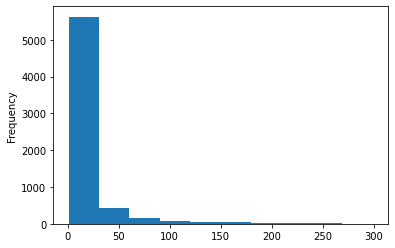

In [55]:
# APPEARANCES is a continuous variable, can be displayed as histogram
comic_dc['Appearances1'].plot(kind='hist');

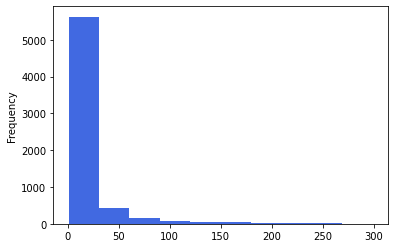

In [56]:
# removing outliers
comic_dc=comic_dc[comic_dc['Appearances1']<300]
comic_dc['Appearances1'].plot(kind='hist', color='royalblue');

In [57]:
# converting continuous variables to categorical
appbins=[0,10,15,25,500]
applabels=['vcommon', 'common', 'uncommon', 'rare']
comic_dc['app_groups']= pd.cut(comic_dc['Appearances1'], bins=appbins, labels=applabels)
myresults = comic_dc['app_groups'].value_counts().sort_index()
myresults

vcommon     4308
common       619
uncommon     551
rare         993
Name: app_groups, dtype: int64

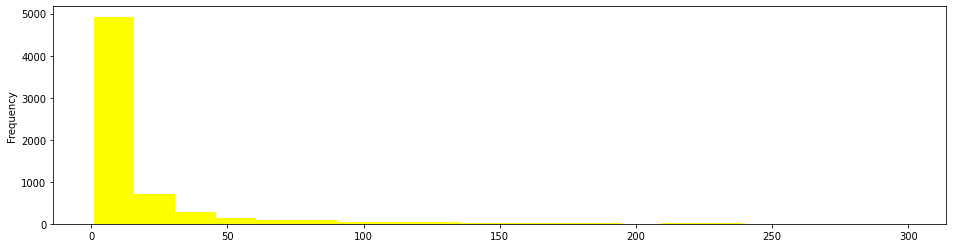

In [58]:
# display single continuous variable
comic_dc['Appearances1'].plot(kind='hist', bins=20, figsize=(16,4), color='yellow');

In [63]:
# stacked histogram by sex and by appearance
comic_dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Sex_2,Appearances1,app_groups
70,1825,Kilowog (New Earth),\/wiki\/Kilowog_(New_Earth),Public Identity,Good Characters,Red Eyes,NaN,Male Characters,NaN,Living Characters,299.0,"1986, June",1986.0,Male,299.0,rare
71,1870,Kara Zor-El (New Earth),\/wiki\/Kara_Zor-El_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,297.0,"2004, May",2004.0,Female,297.0,rare
72,7155,Jonah Hex (New Earth),\/wiki\/Jonah_Hex_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Deceased Characters,291.0,"1972, March",1972.0,Male,291.0,rare
73,1681,Rex Tyler (New Earth),\/wiki\/Rex_Tyler_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Brown Hair,Male Characters,NaN,Living Characters,288.0,"1940, March",1940.0,Male,288.0,rare
74,1464,Pamela Isley (New Earth),\/wiki\/Pamela_Isley_(New_Earth),Secret Identity,Neutral Characters,Green Eyes,Red Hair,Female Characters,NaN,Living Characters,286.0,"1966, June",1966.0,Female,286.0,rare


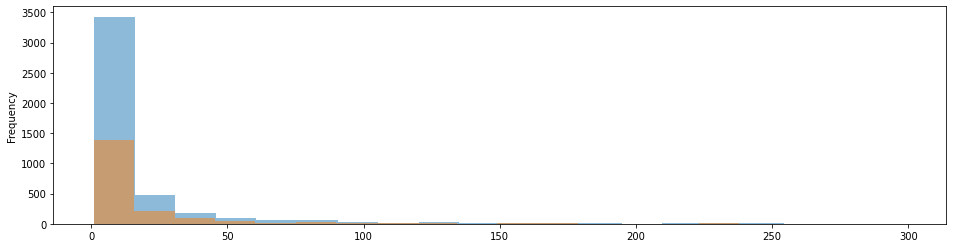

In [64]:
comic_dc[comic_dc['Sex_2']=='Male']['Appearances1'].plot(kind='hist', bins=20, figsize=(16,4), alpha=0.5);
comic_dc[comic_dc['Sex_2']=='Female']['Appearances1'].plot(kind='hist', bins=20, figsize=(16,4), alpha=0.5);

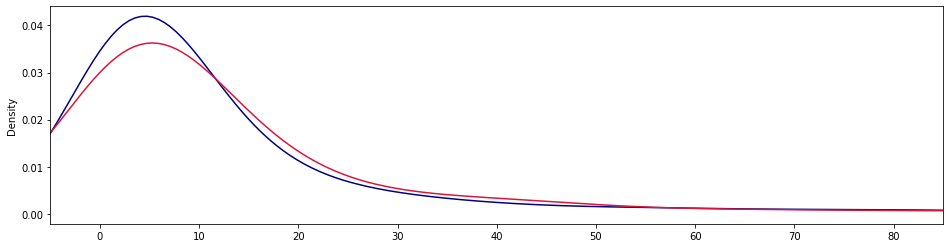

In [67]:
# using kernel density estimate
comic_dc[comic_dc['Sex_2']=='Male']['Appearances1'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
comic_dc[comic_dc['Sex_2']=='Female']['Appearances1'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

In [0]:
# Display a single categorical variable

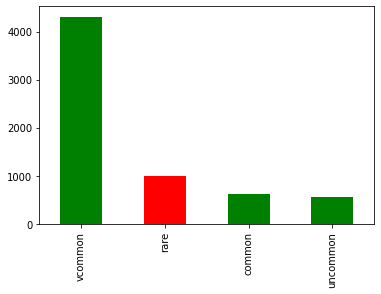

In [69]:
# Bar chart `pop` the rare category
comic_dc['app_groups'].value_counts().plot(kind='bar', color=['green', 'red', 'green', 'green']);

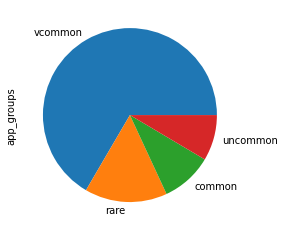

In [72]:
# pie chart
comic_dc['app_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [73]:
# Compare 2 categorical variables using crosstab
char_id = pd.crosstab(comic_dc['ID'], comic_dc['app_groups'])
char_id

app_groups,vcommon,common,uncommon,rare
ID,,,,
Identity Unknown,8,1,0,0
Public Identity,1358,270,232,470
Secret Identity,1379,198,212,460


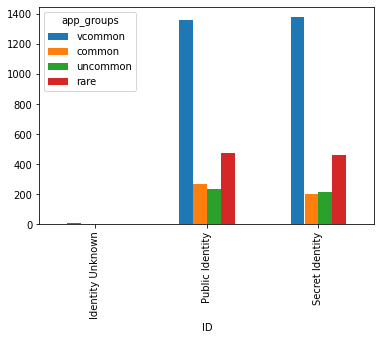

In [74]:
# bar chart of data above
char_id.plot(kind='bar');

In [75]:
# crosstab with column percents
char_id1 = pd.crosstab(comic_dc['ID'],comic_dc['app_groups'], normalize='columns')
char_id1

app_groups,vcommon,common,uncommon,rare
ID,,,,
Identity Unknown,0.002914,0.002132,0.000000,0.000000
Public Identity,0.494718,0.575693,0.522523,0.505376
Secret Identity,0.502368,0.422175,0.477477,0.494624


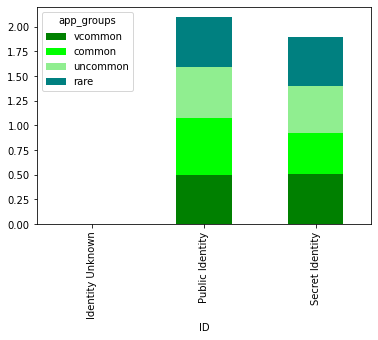

In [81]:
# stacked bar
char_id1.plot(kind='bar', stacked=True, color=['green', 'lime', 'lightgreen', 'teal']);

In [82]:
# crosstab with column percents
char_id2 = pd.crosstab(comic_dc['ID'],comic_dc['app_groups'], normalize='index')
char_id2

app_groups,vcommon,common,uncommon,rare
ID,,,,
Identity Unknown,0.888889,0.111111,0.000000,0.000000
Public Identity,0.582833,0.115880,0.099571,0.201717
Secret Identity,0.613161,0.088039,0.094264,0.204535


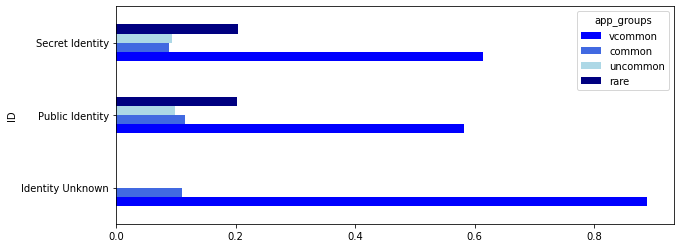

In [83]:
# paired barchart
char_id2.plot(kind='barh', color=['blue', 'royalblue', 'lightblue', 'navy'], figsize=(10,4));

In [0]:
# Compare a categorical and continuous variable

In [84]:
comic_dc['Appearances1'].mean()

16.967856590944212

In [86]:
# continuous variable broken by category
ID_app = comic_dc.groupby('ID')['Appearances1'].mean()
ID_app

ID
Identity Unknown     3.000000
Public Identity     20.756223
Secret Identity     21.523344
Name: Appearances1, dtype: float64

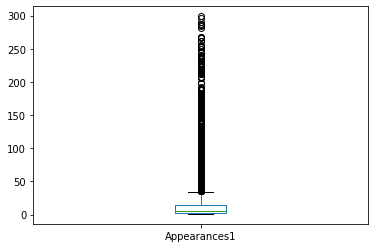

In [87]:
# visualizing using box plot
comic_dc['Appearances1'].plot(kind='box');

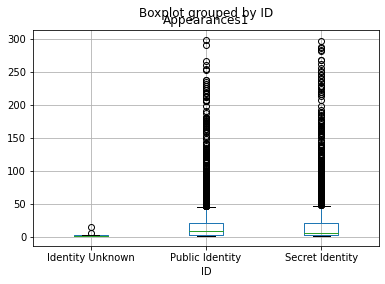

In [88]:
# using boxplot to break cont var to cat var
comic_dc.boxplot(column='Appearances1', by='ID');

In [0]:
# Comparing 2 or 3 continuous variables
# Used the YEAR column as additional cont var
# convert from float to int
# remove NaN values

In [96]:
comic_dc['Year1'].head()

70    1986.0
71    2004.0
72    1972.0
73    1940.0
74    1966.0
Name: Year1, dtype: float64

In [97]:
comic_dc['Year1'].value_counts(dropna=False)

2006.0    287
1988.0    274
2010.0    270
1989.0    254
1987.0    246
         ... 
2012.0      4
1952.0      4
1935.0      1
2013.0      1
1953.0      1
Name: Year1, Length: 80, dtype: int64

In [98]:
type(np.nan)

float

In [0]:
comic_dc['Year1'].dropna(inplace=True)

In [102]:
comic_dc['Year1'].isnull().sum()

0

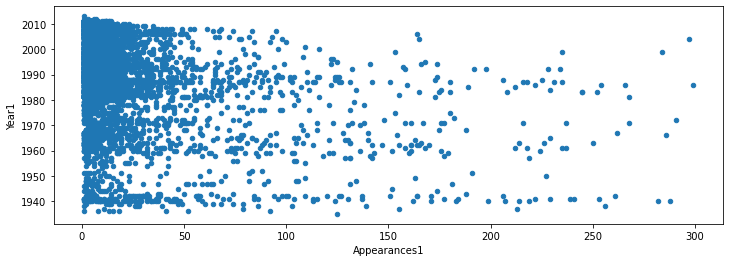

In [129]:
comic_dc.plot(kind ='scatter', x='Appearances1', y='Year1', figsize=(12,4));

In [113]:
# need to create additional categorical variable that is int
# to be used in three variables scatter plot
# clean up ID data to numeric
comic_dc['ID1'] = comic_dc['ID'].map({'Identity Unknown':1, 'Public Identity':2, 'Secret Identity':3})
comic_dc['ID1'].tail()

6536    2.0
6537    2.0
6538    NaN
6539    2.0
6540    3.0
Name: ID1, dtype: float64

In [114]:
comic_dc['ID1'].value_counts(dropna=False)

2.0    2330
3.0    2249
NaN    1883
1.0       9
Name: ID1, dtype: int64

In [0]:
comic_dc['ID1'].dropna(inplace=True)

In [116]:
comic_dc['ID1'].isnull().sum()

0

In [117]:
comic_dc['ID1'].tail()

6534    2.0
6536    2.0
6537    2.0
6539    2.0
6540    3.0
Name: ID1, dtype: float64

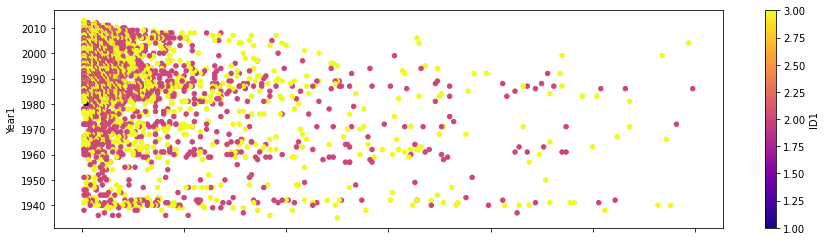

In [130]:
comic_dc.plot(kind = 'scatter', x='Appearances1', y='Year1', c='ID1', colormap='plasma', figsize=(15,4));

In [0]:
# Use a line plot to examine 2 cont var

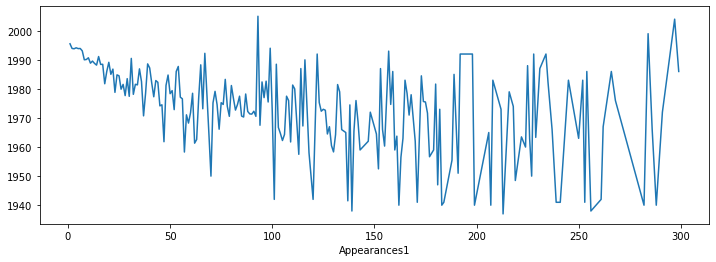

In [131]:
# line chart: appearance by year
comic_dc.groupby('Appearances1')['Year1'].mean().plot(figsize=(12,4));

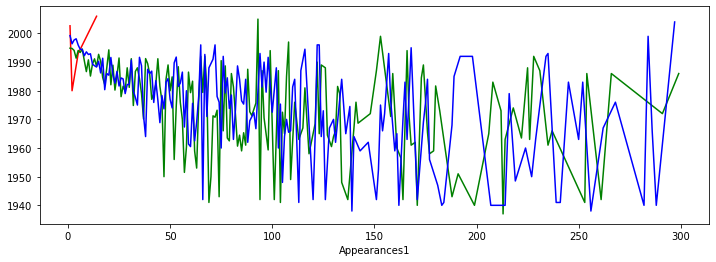

In [132]:
# Line chart: appearances by year by ID
mycolors = ['red', 'green', 'blue']
for x in [1,2,3]:
  comic_dc[comic_dc['ID1']==x].groupby('Appearances1')['Year1'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [137]:
# compare multiple continuous variables
# correlation matrix
corr_matrix = comic_dc.corr()
corr_matrix

,page_id,APPEARANCES,YEAR,Appearances1,Year1,ID1
page_id,1.000000,-0.396944,0.245051,-0.396944,0.245051,-0.169589
APPEARANCES,-0.396944,1.000000,-0.348177,1.000000,-0.348177,0.012693
YEAR,0.245051,-0.348177,1.000000,-0.348177,1.000000,0.063701
Appearances1,-0.396944,1.000000,-0.348177,1.000000,-0.348177,0.012693
Year1,0.245051,-0.348177,1.000000,-0.348177,1.000000,0.063701
ID1,-0.169589,0.012693,0.063701,0.012693,0.063701,1.000000


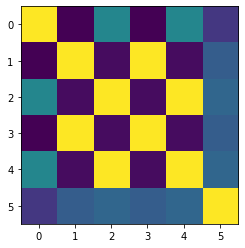

In [138]:
# heat map
plt.imshow(corr_matrix);

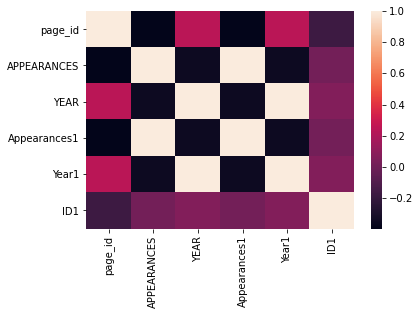

In [139]:
# seaborn heatmap
sns.heatmap(corr_matrix);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here